# Download Dataset

Dataset consists of 590 manufacturing operation variables 
Dataset contains 1567 examples taken from a wafer fabrication production line.


**Import Libraries**

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro


**Download Secom.data and Put it in dataframe(df1)**

In [164]:
url1 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
names = ["feature" + str(x) for x in range(1, 591)]
df1 = pd.read_csv(url1,sep=" ", names=names, na_values = "NaN",header=None)
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


**Download Secom Label.data and Put it in dataframe(df2) and rename the columns**

In [165]:
url2 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
df2 = pd.read_csv(url2,sep=" ",names = ["Result","Date"])

#df2.columns =['Pass/Fail','Date']
df2.head()

,Result,Date
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


**Joining both the datasets**

In [166]:
#Convertion of Date into Datetime from Object(String) data types
df2['Date'] = pd.to_datetime(df2['Date'])
df2.dtypes



#Joinig TWO df1 and df2 Dataframe naming SECOM
Secom = pd.concat([df1,df2],axis = 1)
print(Secom)

      feature1  feature2   feature3   feature4  feature5  feature6  feature7  \
0      3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1      3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2      2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3      2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4      3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   
...        ...       ...        ...        ...       ...       ...       ...   
1562   2899.41   2464.36  2179.7333  3085.3781    1.4843     100.0   82.2467   
1563   3052.31   2522.55  2198.5667  1124.6595    0.8763     100.0   98.4689   
1564   2978.81   2379.78  2206.3000  1110.4967    0.8236     100.0   99.4122   
1565   2894.92   2532.01  2177.0333  1183.7287    1.5726     100.0   98.7978   
1566   2944.92   2450.76  2195.4444  2914.1792    1.5978     100.0   85.1011   

      feature8  feature9  feature10  ..

In [167]:
Secom.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result,Date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


***We can assume there are 590 independent processes that together add up to create a semiconductor and at the end of the process they are tagged as success or failure in terms of creating 1 new functional semiconductor unit.
There are quite a few NaN entries which may indicate an error or lack of signal i/o.***



In [168]:
Secom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, feature1 to Date
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB


**Get the exact number of manufacturing Pass and failures**

In [169]:
Counter(Secom['Result'])

Counter({-1: 1463, 1: 104})

***104 values belong to the fail Category and 1463 to Pass. Large Class imbalance can be seen.***

# **Exploratory Data Analysis Before Cleaning the Data**

**Plotting a histogram of the pass and fail cases**

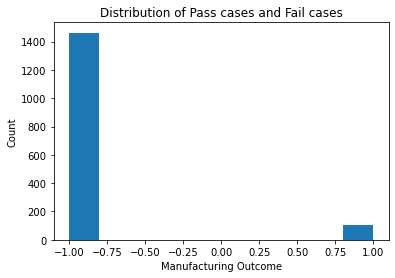

In [170]:

plt.hist(Secom['Result'])
plt.title('Distribution of Pass cases and Fail cases')
plt.ylabel('Count')
plt.xlabel('Manufacturing Outcome')
plt.show()


**Plot the manufacturing outcome as a time series**

Text(0.5, 1.0, 'Time series of Result')

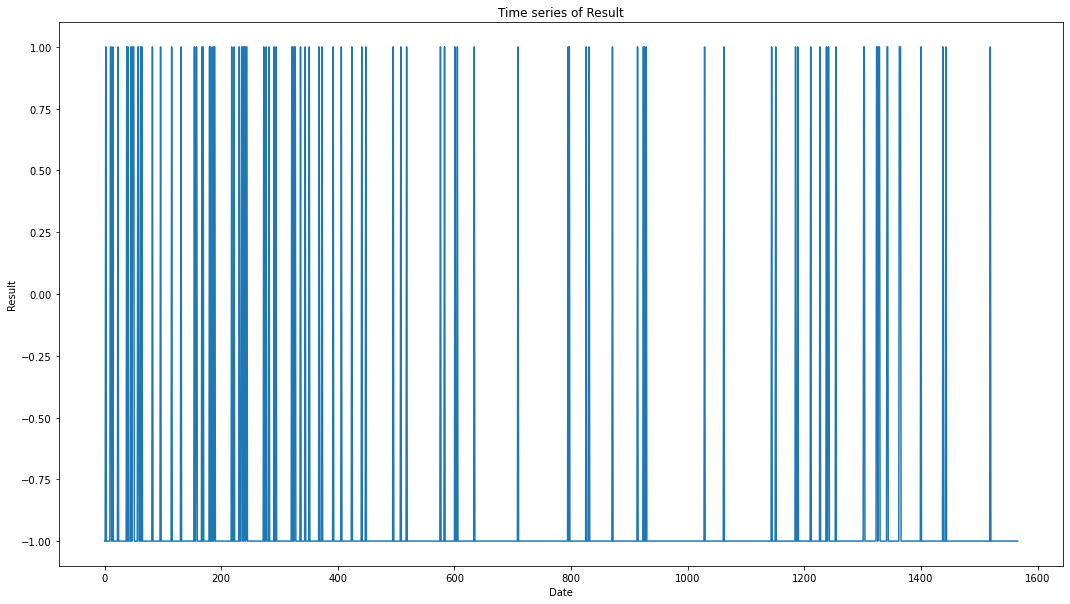

In [171]:

ax = plt.figure(figsize=(18, 10)).gca() # define plot
Secom.Result.plot(ax = ax) # plot result
ax.set_xlabel('Date')
ax.set_ylabel('Result')
ax.set_title('Time series of Result')

# Univariate analysis

**Unique Value Analysis**

['feature6', 'feature14', 'feature43', 'feature50', 'feature53', 'feature70', 'feature98', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', 'feature399',

1534

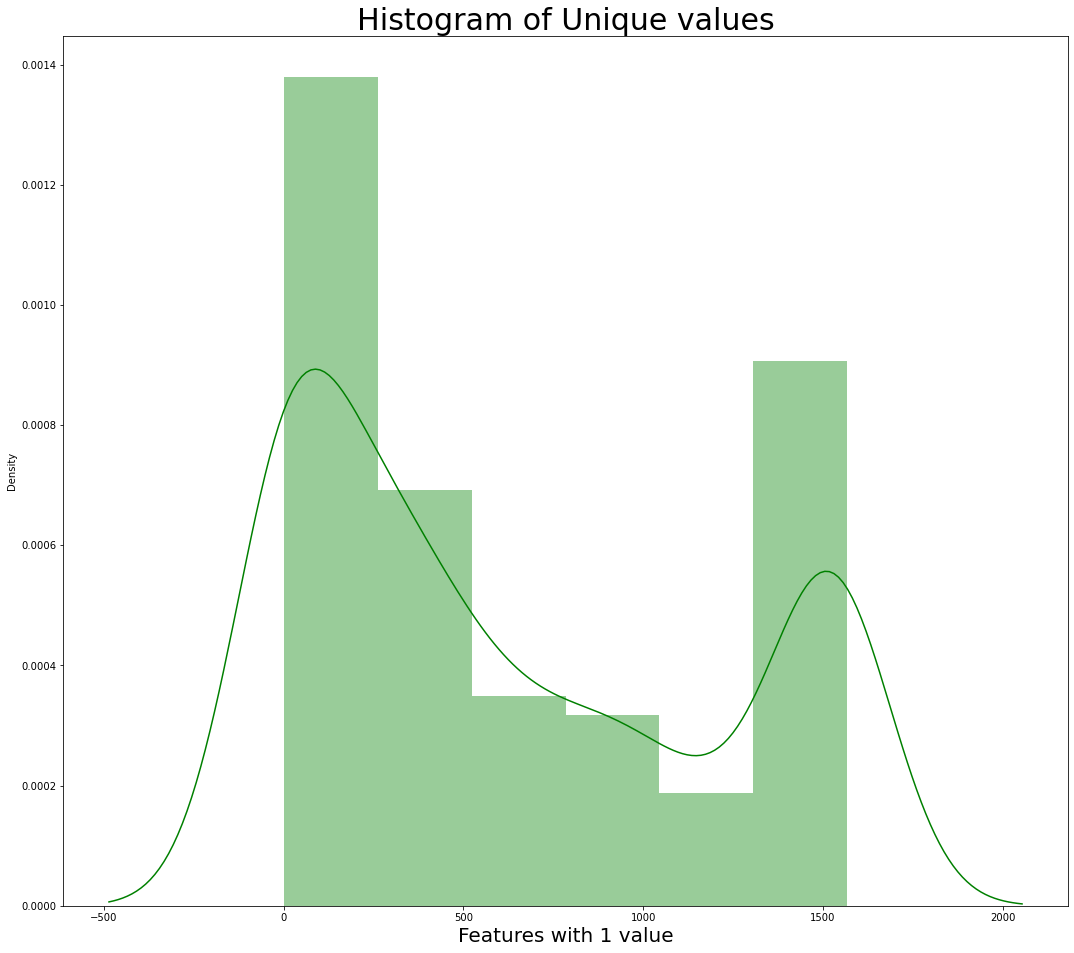

In [172]:
#Find the features with one value
features_with_one_value=[]
for label,content in Secom.items():
    if Secom[label].nunique()==1:
        features_with_one_value.append(label)
    

print(features_with_one_value, len(features_with_one_value))



#unique values in dataframe
nunique = Secom.apply(pd.Series.nunique)
nunique.sum()



#diagram to show unique value
plt.rcParams['figure.figsize'] = (18, 16)
sns.distplot(nunique, color = 'green')
plt.xlabel('Features with 1 value',fontsize=20)
plt.title('Histogram of Unique values',fontsize=30)



#Counts unique values in date
date_unique=Secom['Date'].nunique()
Secom['Date'].isnull().count()
date_unique

***As we can see of the 591 features 116 of them only have 1 unique value which indicates a faulty signal across all batches and therefore we can decide to drop these later.***

**Missing Value Analysis**

In [197]:
#Percentage of missing values
# Count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : ",Secom.isnull().sum().sum())








 
Count total NaN in a DataFrame :  41951


In [198]:
#total number of columns with missing values
sum(Secom.apply(lambda x: sum(x.isnull().values),axis=0)>0)



538

In [199]:
percent = pd.DataFrame({'Missing Percentage %':(Secom.isnull().sum() * 100 / len(Secom)).round(4).sort_values(ascending=False)})
percent
above_ff = percent[percent['Missing Percentage %'] > 55]
above_ff
above_ff.shape


(24, 1)

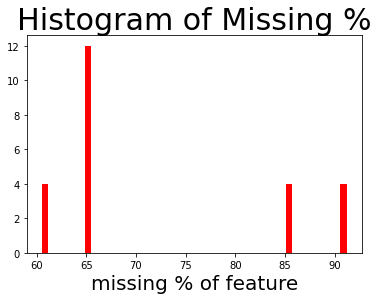

In [200]:

#matplot histplot for missing percentage of feature



plt.hist(above_ff,50,facecolor='r')
plt.xlabel('missing % of feature',fontsize=20)
plt.title('Histogram of Missing %',fontsize=30)
plt.show()


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (592).

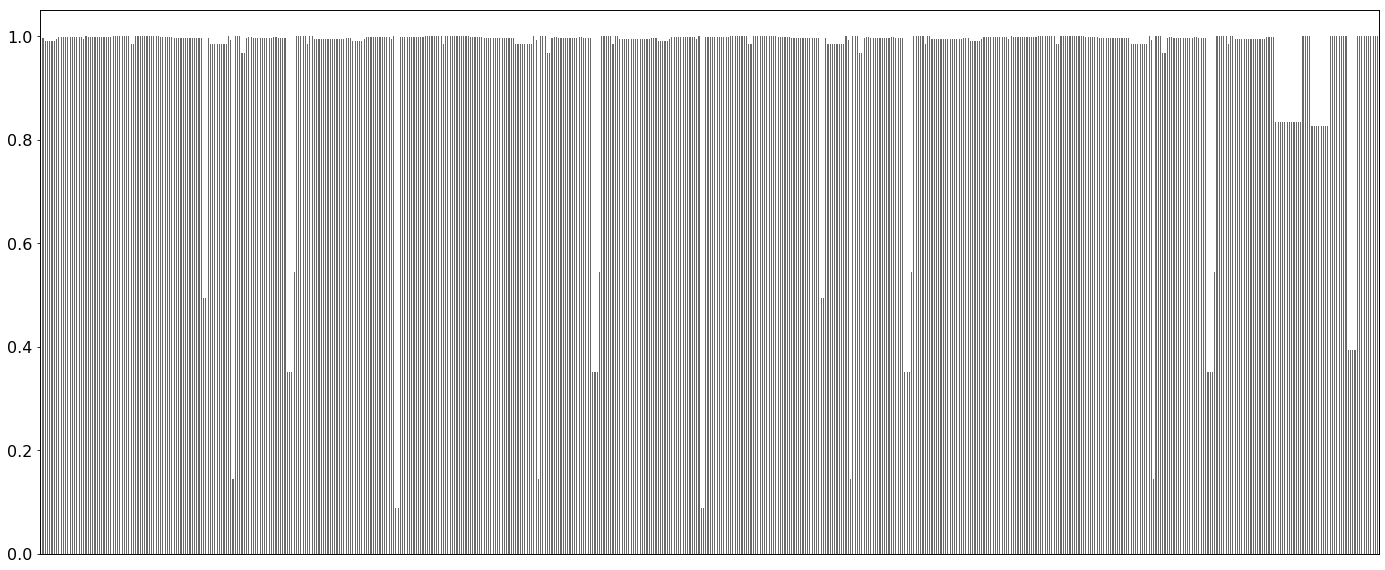

In [201]:
#bargraph represnts columns with missing values
msno.bar(Secom)

***As we can see the number of missing values are quite large and sometimes more than half the values of the columns are entirely missing, we can consider dropping them altogether as the inconsistensies in between the rows of processes will not help in predicting the target variable. Some of the columns are entirely filled with the value of 0 which we should eliminate as well. Some features even exhibit negative values and many may have outliers on the higher side as we can see from the gap between max and 75%***

**Skewness Analysis**

In [ ]:
#skewness 
from scipy.stats import skew
dataFrame = pd.DataFrame(data=df1,);
skewValue = dataFrame.skew(axis=0)
skew_dict = skewValue.to_dict()
skew_dict
skewness=pd.DataFrame(skew_dict,index=["skewness"])
sum((skewness.iloc[0]>-0.5) & (skewness.iloc[0]<0.5))
#approximately symmetric
sum((skewness.iloc[0]>-1) & (skewness.iloc[0]<-0.5)|(skewness.iloc[0]>0.5) & (skewness.iloc[0]<1))
#moderatedly skewed
sum((skewness.iloc[0]<-1) | (skewness.iloc[0]>1))
#highly skewed

**Shapiro Test for Normality**

In [182]:
def get_shapiro_for_col(df, col_name):

  return shapiro(df[df[col_name].notnull()][col_name])


shapiro_test_value_dict = dict()

shapiro_p_value_dict = dict()

for col in df1.columns:

  test_value, p_value = get_shapiro_for_col(df1, col)

  print(col, test_value, p_value)

  shapiro_test_value_dict[col] = test_value

  shapiro_p_value_dict[col] = p_value
  Shapiro=pd.DataFrame(shapiro_p_value_dict,index=["Shapiro"])

#sum(shapiro.iloc[0]<0.05)

#sum(shapiro.iloc[0]>0.05)

feature1 0.9771898984909058 4.862922029305345e-15
feature2 0.9688883423805237 7.748977520379398e-18
feature3 0.9760406017303467 2.0254281480897984e-15
feature4 0.8654948472976685 1.541578303951258e-34
feature5 0.027222633361816406 0.0
feature6 1.0 1.0
feature7 0.9586617946624756 1.3821661354355443e-20
feature8 0.1688460111618042 0.0
feature9 0.9967930316925049 0.0025206096470355988
feature10 0.9920227527618408 1.6867926433405955e-07
feature11 0.9876825213432312 2.890530870214292e-10
feature12 0.6568070650100708 0.0
feature13 0.7323095202445984 1.401298464324817e-44
feature14 1.0 1.0
feature15 0.9957044124603271 0.00020044577831868082
feature16 0.37527012825012207 0.0
feature17 0.08182919025421143 0.0
feature18 0.3876229524612427 0.0
feature19 0.9491711258888245 7.773026414554584e-23
feature20 0.30713820457458496 0.0
feature21 0.865615725517273 1.1687539697874015e-34
feature22 0.7691605687141418 2.5139294449987218e-42
feature23 0.8039490580558777 6.3930038539426804e-40
feature24 0.92464

**Volatility Analysis**

In [ ]:
return_data = Secom.pct_change()#Percentchange from prior value
volatility = return_data.std()#standard deviation
type_volatility=volatility.to_dict()#to display all features volatility
#type_volatility


TypeError: 'AxesSubplot' object is not subscriptable

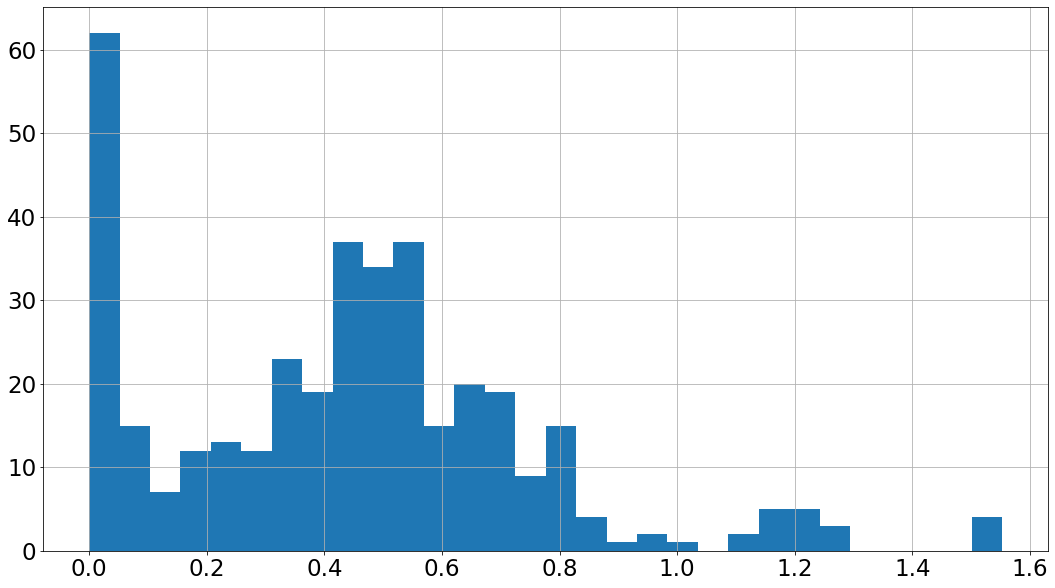

In [118]:

plt.figure(figsize=(18, 10))
volatility=Secom.pct_change().apply(lambda x: np.log(1+x)).std().hist(bins=30)
#volatility=Secom.pct_change().std().hist(bins=50)
above_df = volatility[volatility==2]
#above_df.hist(bins=30, color='#86bf91', zorder=2, rwidth=0.9,)
#above_df.hist(bins=30)
above_df.count()
#above_df.set_xlabel("Volatility", labelpad=20, weight='bold', size=12)
#above_df.set_ylabel("No of features", labelpad=20, weight='bold', size=12)
plt.xlabel('Volatility',fontweight ="bold")
plt.ylabel('Number of features',fontweight ="bold")
  


In [123]:
#x= df1.pct_change().apply(lambda x: np.log(1+x)).std()
x= df1.pct_change().std()
x = x[x== 0]
x.count()

4

**Outlier Analysis**

feature1 16
feature2 18
feature3 12
feature4 32
feature5 4
feature6 0
feature7 20
feature8 8
feature9 4
feature10 12
feature11 17
feature12 3
feature13 5
feature14 0
feature15 6
feature16 4
feature17 1
feature18 2
feature19 9
feature20 11
feature21 10
feature22 24
feature23 27
feature24 31
feature25 36
feature26 35
feature27 39
feature28 33
feature29 0
feature30 10
feature31 10
feature32 0
feature33 27
feature34 19
feature35 32
feature36 38
feature37 32
feature38 33
feature39 71
feature40 37
feature41 0
feature42 6
feature43 0
feature44 6
feature45 10
feature46 10
feature47 4
feature48 1
feature49 5
feature50 0
feature51 5
feature52 0
feature53 0
feature54 10
feature55 8
feature56 5
feature57 15
feature58 10
feature59 12
feature60 5
feature61 6
feature62 16
feature63 14
feature64 8
feature65 23
feature66 17
feature67 8
feature68 4
feature69 5
feature70 0
feature71 6
feature72 40
feature73 8
feature74 9
feature75 1
feature76 20
feature77 6
feature78 5
feature79 5
feature80 18
feature81 

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([ 0.   ,  8.875, 17.75 , 26.625, 35.5  , 44.375, 53.25 , 62.125,
        71.   ]),
 <a list of 590 BarContainer objects>)

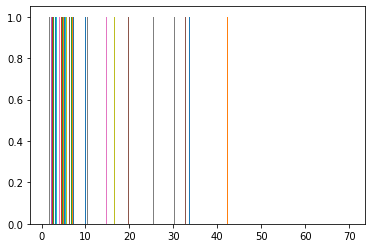

In [183]:
# outlier 
def get_outlier(df, col_name, limit_factor=3):
  upper_limit = df[col_name].mean()+ limit_factor*df[col_name].std()
  lower_limit = df[col_name].mean()- limit_factor*df[col_name].std()
  return len(df[(df[col_name]<lower_limit)|(df[col_name]>upper_limit)])
 
outlier_dict = dict()
for col in df1.columns:
  count = get_outlier(df1, col, limit_factor=3)
  print(col, count)
  outlier_dict[col] = count
 
count_outliers=pd.DataFrame(outlier_dict,index=["outliers"])
 
plt.hist(count_outliers, bins=8)

In [157]:
from scipy import stats

def outliers_high(Secom):
    q1= Secom.quantile(.25)
    q2= Secom.quantile(.5)
    q3= Secom.quantile(.75)
    Secom = np.where(Secom > q3+ stats.iqr(Secom),q2,Secom)
    return Secom

def outliers_low(feat):
    q1= Secom.quantile(.25)
    q2= Secom.quantile(.5)
    q3= Secom.quantile(.75)
    Secom = np.where(Secom < q1 - stats.iqr(Secom),q2,Secom)
    return Secom

feature1         AxesSubplot(0.125,0.87475;0.133621x0.00525035)
feature2      AxesSubplot(0.285345,0.87475;0.133621x0.00525035)
feature3       AxesSubplot(0.44569,0.87475;0.133621x0.00525035)
feature4      AxesSubplot(0.606034,0.87475;0.133621x0.00525035)
feature5      AxesSubplot(0.766379,0.87475;0.133621x0.00525035)
                                    ...                        
feature587    AxesSubplot(0.285345,0.137601;0.133621x0.00525...
feature588    AxesSubplot(0.44569,0.137601;0.133621x0.00525035)
feature589    AxesSubplot(0.606034,0.137601;0.133621x0.00525...
feature590    AxesSubplot(0.766379,0.137601;0.133621x0.00525...
Result            AxesSubplot(0.125,0.1313;0.133621x0.00525035)
Length: 591, dtype: object

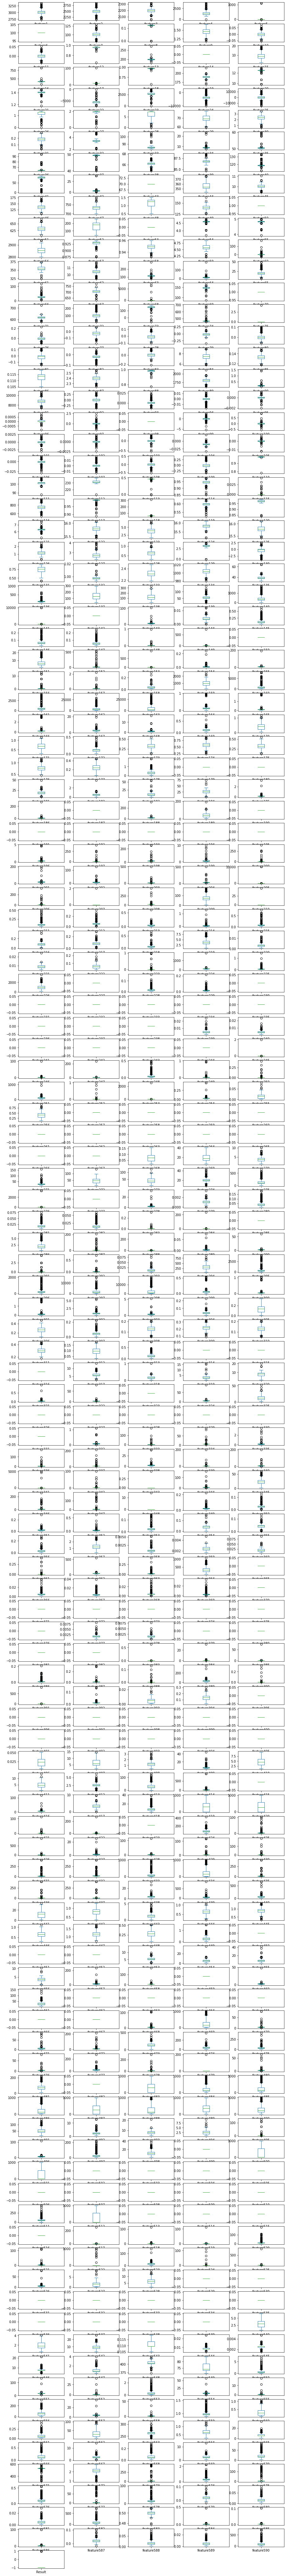

In [158]:
Secom.plot(kind='box', subplots=True,layout=(120,5), fontsize=10, figsize=(15,150))

**Correlation Analysis**

<AxesSubplot:>

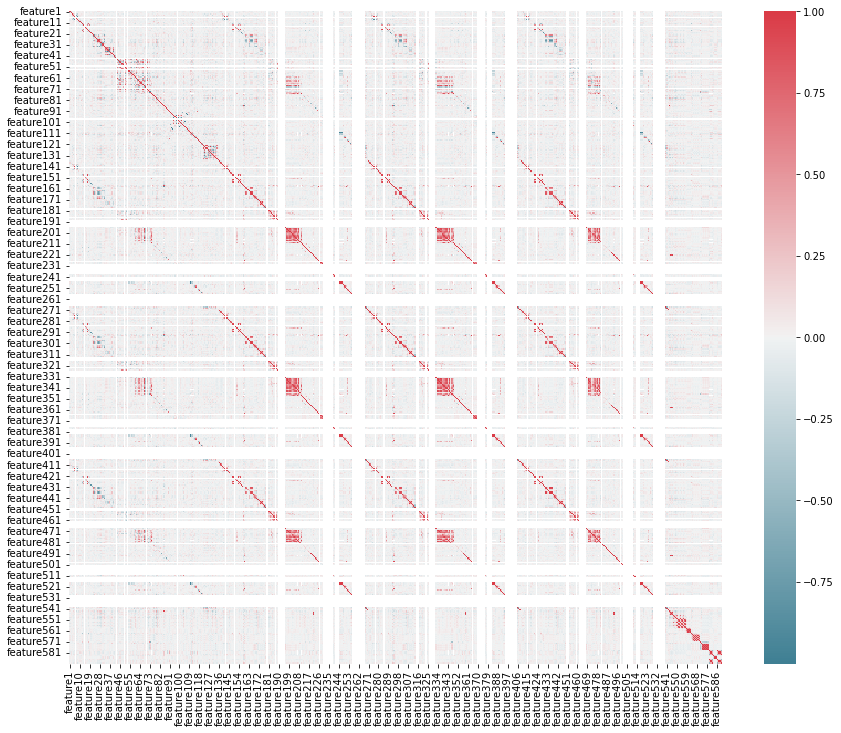

In [154]:
f, ax = plt.subplots(figsize=(15, 12))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [161]:
# Create correlation matrix
corr_matrix = Secom.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop1 = [column for column in upper.columns if any(upper[column] < -0.9)]
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop1)
print(to_drop2)

['feature8', 'feature37', 'feature97', 'feature105', 'feature106', 'feature107', 'feature141', 'feature245', 'feature247', 'feature276', 'feature383', 'feature384', 'feature385', 'feature517', 'feature518', 'feature519']
['feature28', 'feature51', 'feature55', 'feature61', 'feature71', 'feature102', 'feature124', 'feature128', 'feature141', 'feature149', 'feature153', 'feature155', 'feature158', 'feature165', 'feature166', 'feature175', 'feature200', 'feature205', 'feature207', 'feature208', 'feature210', 'feature226', 'feature246', 'feature247', 'feature250', 'feature253', 'feature271', 'feature272', 'feature273', 'feature274', 'feature275', 'feature276', 'feature278', 'feature279', 'feature280', 'feature281', 'feature282', 'feature283', 'feature284', 'feature286', 'feature287', 'feature288', 'feature289', 'feature290', 'feature291', 'feature292', 'feature293', 'feature294', 'feature295', 'feature296', 'feature297', 'feature298', 'feature299', 'feature300', 'feature301', 'feature302',

**Data Splitting**

In [194]:
# establish target and features of the manufacturing data
# set the target to the encoded manufacturing outcome column
x = Secom[['Result']]
# set the features as the rest of the dataset after dropping the features that are no
y = Secom.drop(['Result'], axis=1)

In [195]:
# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)



# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x: (1567, 1)
shape of y: (1567, 591)
shape of x_train:  (1096, 1)
shape of x_test:  (471, 1)
shape of y_train:  (1096, 591)
shape of y_test:  (471, 591)


**Summary statistics for the entire dataset**

In [196]:
df_list = Secom.describe(),
pd.DataFrame(outlier_dict, index=['outlier_count']),
#pd.DataFrame(null_dict, index=['null_count']),
pd.DataFrame(skew_dict, index=['skew']),
#pd.DataFrame(type_dict, index=['dtype']),
pd.DataFrame(shapiro_test_value_dict, index=['shapiro_test_value']),
pd.DataFrame(shapiro_p_value_dict, index=['shapiro_p_value']),

detailed_describe = pd.concat(df_list)
detailed_describe

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**Data Visualization**

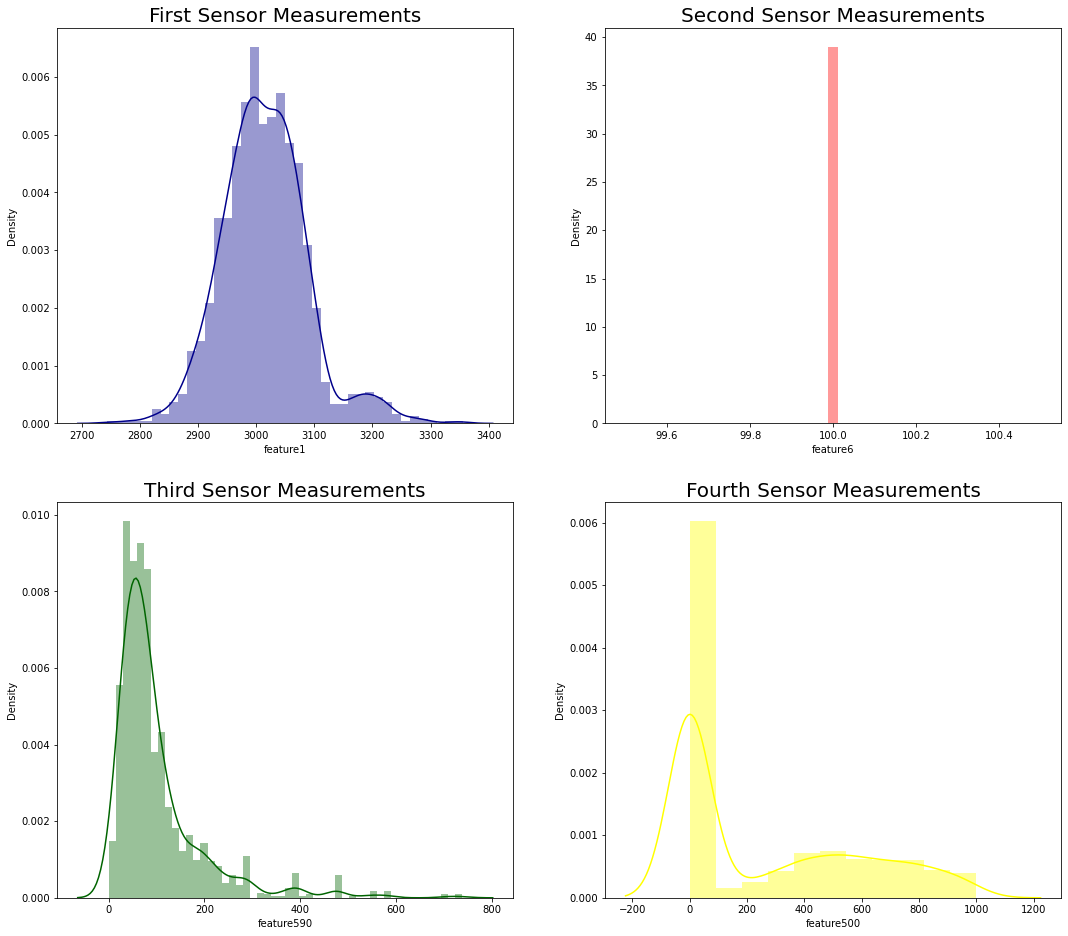

In [42]:
# plot a histogram of the distributions of a few features
plt.rcParams['figure.figsize'] = (18, 16)
plt.subplot(2, 2, 1)
sns.distplot(Secom['feature1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)
plt.subplot(2, 2, 2)
sns.distplot(Secom['feature6'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)
plt.subplot(2, 2, 3)
sns.distplot(Secom['feature590'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)
plt.subplot(2, 2, 4)
sns.distplot(Secom['feature500'], color = 'yellow')
plt.title('Fourth Sensor Measurements', fontsize = 20)
plt.show()
